데이터 및 코드: https://github.com/datascienceabe/study_open/tree/master/Linear_Regression

출처: Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012). Introduction to linear regression analysis (Vol. 821). John Wiley & Sons.<br>
데이터: http://bcs.wiley.com/he-bcs/Books?action=resource&bcsId=9068&itemId=0470542810&resourceId=36322

4장, 6장<br>
목차<br>
1. Multiple Linear Regression
2. Lack of fit test
3. Diagonostics for Leverage and Influence

# Model Adequacy Checking

<가정><br>
1.y와 x의 관계가 근사하게 linear<br>
2.error의 기댓값 0<br>
3.error의 variance constant<br>
4.error는 상관관계 없음<br>
5.error는 normal 분포=> Residual Analysis를 위해 추가<br>

In [4]:
setwd('C:/Users/bki19/desktop/Linear_Regression/data')

In [7]:
df2<-read.csv('./Delivery_Time2.csv')
colnames(df2)<-c('Time','Case','Distance')
fit2<-lm(Time~.,data=df2)

# 1. Residual Analysis

<b>1) Methods of scaling residuals</b>

1) Residual<br>
$e_{i}=y_{i}-\hat{y}_{i}$<br>
데이터와 fit의 차이로 regression model로 설명 안되는 변동성을 측정할 수 있음<br>
<br>
2) Standarized Residual<br>
$d_{i}=\frac{e_{i}}{\sqrt{MS_{res}}   } $<br>
<br>
3) Studentized Residual(Internally Studentized Residual)<br>
$r_{i}=\frac{e_{i}}{\sqrt{MS_{res}}  [1-( \frac{1}{n}+\frac{(x_{i}-\bar{x})^{2}  }{S_{xx}}   )]        } $<br>
=> $x_{i}$가 평균 값에 가까워질 수록 커짐<br>
=> 데이터가 많아질 수록 Standarized Residual과 차이가 없어짐<br>
<br>
3) PRESS residual<br>
$\frac{e_{(i)}}{\sqrt{Var[e_{(i)}]}  }= \frac{e_{(i)}}{\sqrt{\sigma^2(1-h_{ii}) }}$
=> (i)번 째 관측치가 없다고 생각하고 나머지로 적합시켰을 때의 residual을 계산<br>
<br>
4) R-student (Externally Studentized residual)<br>
$t_{i}=\frac{e_{i}}{\sqrt{S_{(i)}^{2}(1-h_{ii})  }  }$<br>
=> Internally Studentized residual과 큰 차이가 없는 경우가 많지만 i번째 관측치가 influential하면 값이 확 커짐<br>
<br>
5) Hat element<br>
=> x의 공간에서 i 번째 관측치의 위치를 측정
=> 공간의 중심에서 멀어질 수록 variance 낮아져서 hat element의 값은 커짐


In [8]:
PRESS <- function(linear.model) {
    pr <- residuals(linear.model)/(1 - lm.influence(linear.model)$hat)
    return (pr)
}

In [9]:
Resid<-data.frame(residual=resid(fit2), stardardized=rstandard(fit2) *(1-lm.influence(fit2)$hat)^0.5,in_studentized=rstandard(fit2),hat=lm.influence(fit2)$hat,PRESS=PRESS(fit2),ex_studentized=rstudent(fit2)   )
Resid

residual,stardardized,in_studentized,hat,PRESS,ex_studentized
-5.0280843,-1.54260631,-1.62767993,0.10180178,-5.59796734,-1.69562881
1.1463854,0.35170879,0.36484267,0.07070164,1.23360321,0.35753764
-0.0497937,-0.01527661,-0.01609165,0.09873476,-0.05524867,-0.01572177
4.9243539,1.51078203,1.57972040,0.08537479,5.38401290,1.63916491
-0.4443983,-0.13634053,-0.14176094,0.07501050,-0.48043610,-0.13856493
-0.2895743,-0.08884082,-0.09080847,0.04286693,-0.30254339,-0.08873728
0.8446235,0.25912883,0.27042496,0.08179867,0.91986749,0.26464769
1.1566049,0.35484408,0.36672118,0.06372559,1.23532680,0.35938983
7.4197062,2.27635117,3.21376278,0.49829216,14.78889824,4.31078012
2.3764129,0.72907878,0.81325432,0.19629595,2.95682585,0.80677584


$e_{9}=7.4197$로 큼<br>
standardized로 봐도 다른거는 +-2안에 있는데 이거는 밖에 있음 <br>
internally studentized로 보면 3.2138로 확연히 큼 <br>
모형이 이 점에 대해 fit이 잘 안됨을 알 수 있음

In [10]:
df2[9,]

,Time,Case,Distance
9,79.24,30,1460


<b>2) Residual Plot analysis</b>

<b>Residuals vs Fitted values</b><br>
$y$와 $\epsilon$의 관계를 짐작하여 모델의 부적합성을 볼 수 있음<br>
1) Fitted가 커질 수록 Residual이 퍼지는 경우 =>  $y$가 커질 수록 $Var[\epsilon]$이 커져 분산이 constant가 아닐 가능성(variance가 y의 증가 함수)<br>
2) Fitted가 커질 수록  Reisdual이 퍼지다가 감소하는 경우 => y의 값이 1보다 작아서 variance가 binomial처럼 증가 하다 감소<br>
=>1),2)에 대해서는 x나 y에 transformation하거나 WLS 이용<br>
3) Fitted와 Residual이 비선형 관계<br>
=>x나 y에 transformation

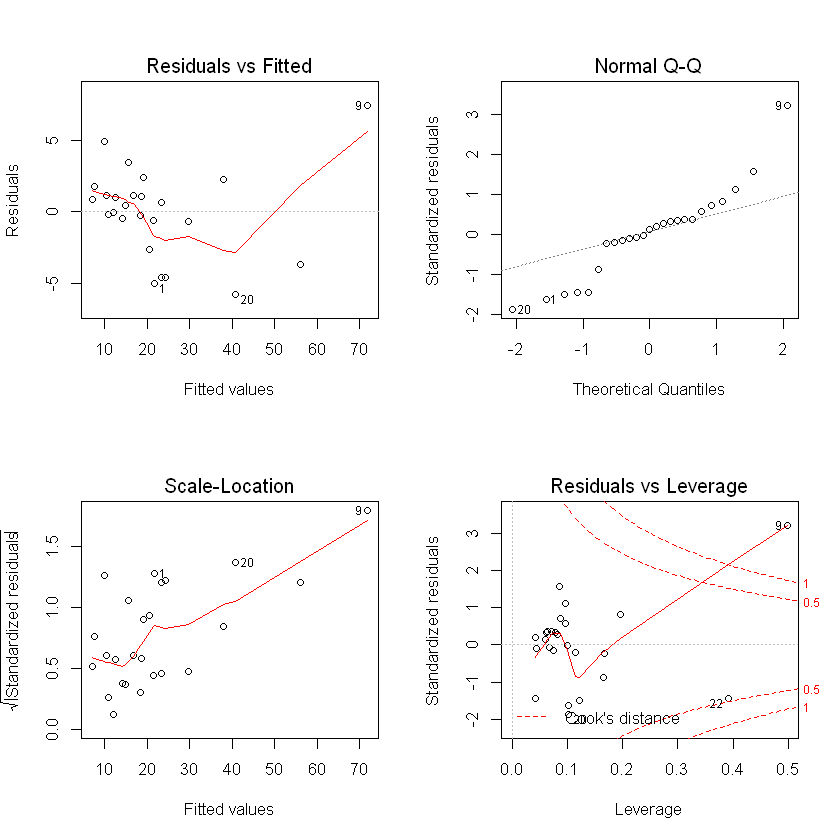

In [29]:
par(mfrow=c(2,2))
plot(fit2)

Normality: plot을 보면 직선에 놓여 있지 않음(꼬리가 너무 두꺼워 보임) -> 한 개 이상의 아웃라이어 있을 듯<br>
Residual vs Fitted value: Misspecification of regressor 없어 보임, inequality of variance 없어 보임<br>

<b>Residuals vs Regressors</b><br>

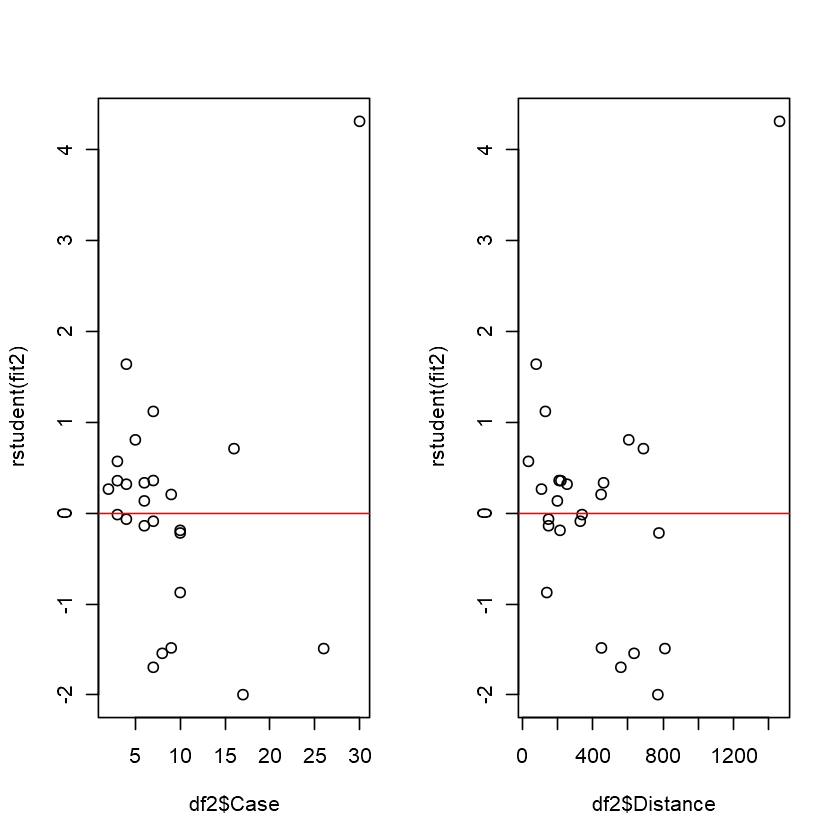

In [11]:
par(mfrow=c(1,2))
plot(df2$Case,rstudent(fit2) );abline(h=0, col="red")
plot(df2$Distance,rstudent(fit2) );abline(h=0, col="red")

regressor와 residual의 관계를 plotting 하는 것은 transformation의 필요성을 항상 볼 수 있는 것은 아님<br>
Omitted variable과 residual의 관계를 보면 potentially include 할지 볼 수 있음<br>
interation effect는 못봄<br>
Multicollinearity가 강하면 잘 못 된 관계를 보여 줄 수 있음

<b>Partial Regression Plot <br></b>
다른 regressor가 주어졌을 때, marginal relationship을 볼 수 있음<br>
이 관계를 보고 transformation을 판단

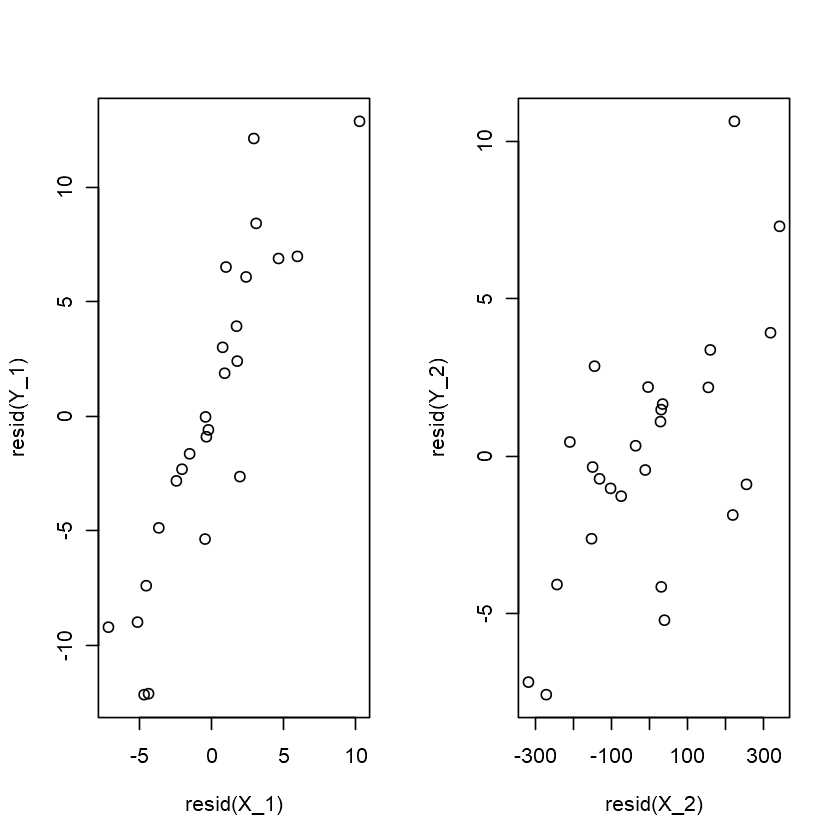

In [12]:
Y_1<-lm(Time~Distance,data=df2)
X_1<-lm(Case~Distance,data=df2)
Y_2<-lm(Time~Case,data=df2)
X_2<-lm(Distance~Case,data=df2)

par(mfrow=c(1,2))
plot( resid(X_1),resid(Y_1) )
plot( resid(X_2),resid(Y_2) )

두 변수다 linear relationship이 명백

<b>3. PRESS STATISTICS <br></b>

Regression 모델이 새로운 데이터를 얼마나 잘 예측할 수 있을지 측정<br>
작을 수록 좋음<br>
$PRESS= \sum[y_{i}-\hat{y}_{(i)}  ]^{2}=\sum(\frac{e_{i}}{1-h_{ii}}) $<br>

In [32]:
233.7317
sum( PRESS(fit2)^2)

[1] 233.7317

[1] 459.0393

SSres에 비해 PRESS STAT이 2배가 넘음 -> 절반이 넘는 PRESS STAT이 point 9에 기여했기 때문<br>
이 모델이 extrapolation에 취약함을 알 수 있음<br>
PRESS STAT은 모델 간 비교에도 사용 가능

$R_{prediction}^{2}=1-\frac{PRESS}{SS_{T}}$<br>
회귀 모형의 예측력에 대한 지표

In [33]:
1-(sum( PRESS(fit2)^2)/5784.5426)

[1] 0.9206438

회귀 모형이 새로운 관측치를 예측하는데 있어 92.09%의 변동성을 설명할 수 있음<br>
원래 데이터에서는 LSE 적합으로 95.96% 설명 가능<br>

# <b>2. Lack of Fit Test<br></b>

- Systematic lack of fit이 존재하는지 판단하는 절차
- 예를 들어 Quadratic term을 추가할지, 혹은 다른 regressor를 추가해야 되는지<br>
- Replicated observation 필요<br>

$i$번째 regressor $x_{i}$에 대응하는 response가 $n_{i}$개 존재 (distinct response)<br>
$y_{ij}$: $x_{i}$에 대한 $j$번째 관측치<br>
총 $n= \sum_{i=1}^{m}n_{i} $의 관측치 존재<br>
<br>
$SS_{Res}=SS_{PE}+SS_{LOF}$<br>
$SS_{Res}$는 fit이 잘 안되서 발생하는 $SS_{LOF}$와 자연적으로 발생하는 $SS_{PE}$으로 나눠짐<br>
$\sum_{i=1}^{m}\sum_{j=1}^{n_{i}}(y_{ij}-\hat{y}_{i}  )^{2}=\sum_{i=1}^{n}\sum_{j=1}^{n_{i}}(y_{ij}-\bar{y}_{i}  )^{2}+ \sum_{i=1}^{m}n_{i}(\bar{y}_{i} -\hat{y}_{i}  )^{2}  $<br>
=> pure error는 같은 x 값에 중복되는 y 값의 변동에 의한 값<br>
=> Lack of fit error는 x 값에 대응 되는 y 값의 평균과 적합 된 y 값의 변동

$H_{0}: E[y_{i}]=\beta_{0}+\beta_{1}x_{i}$<br>
$H_{a}: not H_{0}$<br>
<br>
$F_{0}=\frac{SS_{LOF}/(m-2)}{SS_{PE}/(n-m)} \sim F_{m-2,n-m} Under H_{0}$<br>
만약 $H_{0}$가 참이면 $E(MS_{LOF})=\sigma^{2}$이지만 참이 아니면 $E(MS_{LOF})>\sigma^{2}$가 되어 $F_{0}$ 값이 커짐<br>
Reject H0면, 더 적합한 모형을 찾아야 됨<br>
주의 할 것은 $H_{0}$를 기각 못해 적합한 모형을 찾아도 prediction 관점에서 좋은 모형이란 것은 아님

In [5]:
df_lack<-read.csv('./ex4.8.csv')

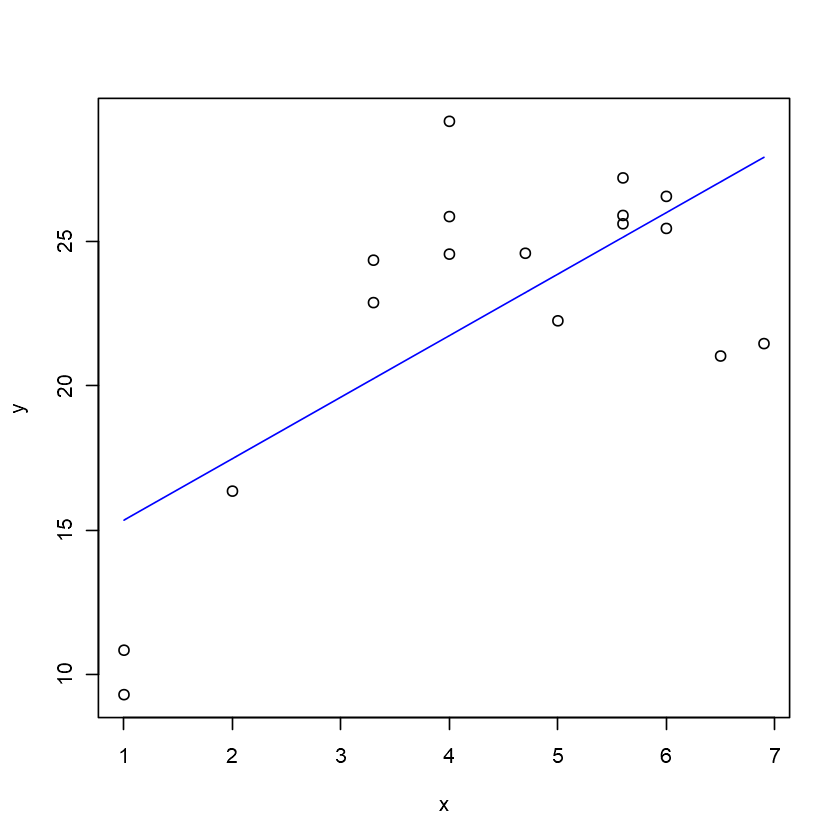

In [18]:
fit_lack<-lm(y~x,data=df_lack)
plot(df_lack)
lines(df_lack[,1],fitted(fit_lack),col=4)

In [8]:
summary(fit_lack)


Call:
lm(formula = y ~ x, data = df_lack)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4536 -1.6158  0.5638  2.6358  7.4246 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  13.2139     2.6649   4.959 0.000172 ***
x             2.1304     0.5645   3.774 0.001839 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.084 on 15 degrees of freedom
Multiple R-squared:  0.487,	Adjusted R-squared:  0.4528 
F-statistic: 14.24 on 1 and 15 DF,  p-value: 0.001839


$i$번째 regressor $x_{i}$에 대응하는 response가 $n_{i}$개 존재 (distinct response)<br>
$y_{ij}$: $x_{i}$에 대한 $j$번째 관측치<br>
총 $n= \sum_{i=1}^{m}n_{i} $의 관측치 존재<br>
<br>
$SS_{Res}=SS_{PE}+SS_{LOF}$<br>
$SS_{Res}$는 fit이 잘 안되서 발생하는 $SS_{LOF}$와 자연적으로 발생하는 $SS_{PE}$으로 나눠짐<br>
$\sum_{i=1}^{m}\sum_{j=1}^{n_{i}}(y_{ij}-\hat{y}_{i}  )^{2}=\sum_{i=1}^{n}\sum_{j=1}^{n_{i}}(y_{ij}-\bar{y}_{i}  )^{2}+ \sum_{i=1}^{m}n_{i}(\bar{y}_{i} -\hat{y}_{i}  )^{2}  $<br>
=> pure error는 같은 x 값에 중복되는 y 값의 변동에 의한 값<br>
=> Lack of fit error는 x 값에 대응 되는 y 값의 평균과 적합 된 y 값의 변동


In [25]:
fit0 <- lm(y ~ 1,data=df_lack) #  y is being predicted by no other variable so the natural prediction is the mean of y
anova(fit0,fit_lack)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
16,487.6126,NA,NA,NA,NA
15,250.1338,1,237.4788,14.2411,0.001839409


$SS_{LOF}=237.4788$<br>
P-value가 매우 작아 모델이 데이터에 잘 적합 됐다는 귀무가설 기각

# 3. Diagonostics for Leverage and Influence 

- Leverage point: 일반적이지 않은 관측치가 regression coefficient를 추정할 때 영향은 없음
- Influential point: 일반적이지 않은 관측치로 regression coefficient를 추정할 때 큰 영향을 줌

In [37]:
df<-read.csv('./Rocket_Prop.csv')
df<-df[,c(2,3)]
colnames(df)<-c('Shear_length','Age_Propellant')
fit<-lm(Shear_length~Age_Propellant,data=df)
resid(fit)

1           2           3           4           5           6 
 106.758301  -67.274574  -14.593631   65.088687 -215.977609 -213.604131 
          7           8           9          10          11          12 
  48.563824   40.061618    8.729573   37.567141   20.374323  -88.946393 
         13          14          15          16          17          18 
  80.817415   71.175153  -45.143358   94.442278    9.499187   37.097528 
         19          20 
 100.684823  -75.320154

5,6번의 절대값이 커 Outlier일 가능성이 큼

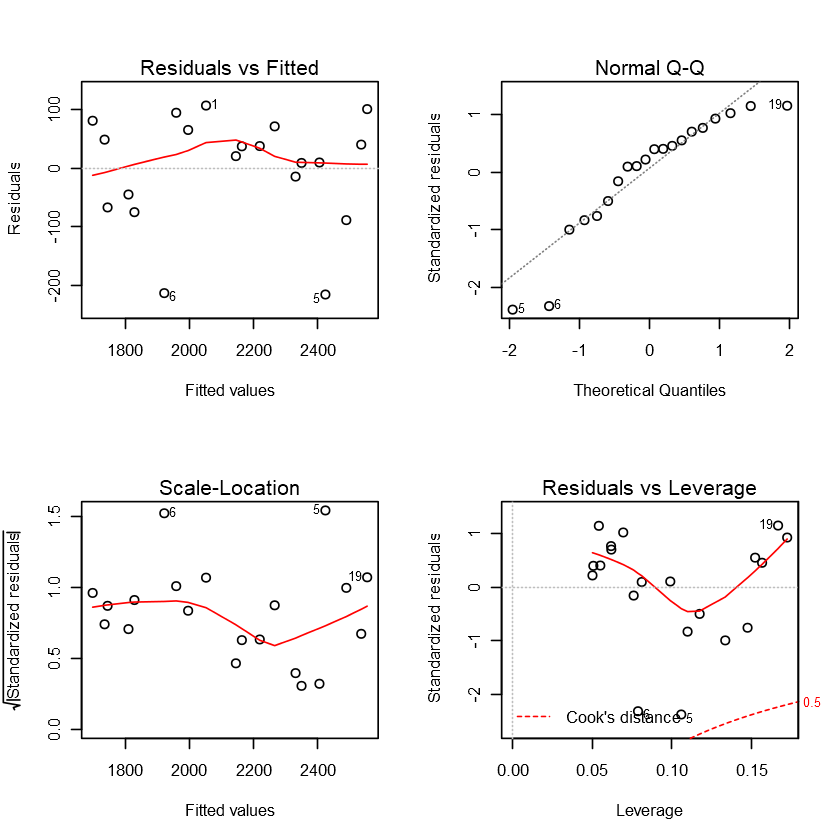

In [38]:
par(mfrow=c(2,2))
plot(fit)

In [39]:
summary(fit)
summary(lm(Shear_length~Age_Propellant,data=df[-c(5,6),]))


Call:
lm(formula = Shear_length ~ Age_Propellant, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-215.98  -50.68   28.74   66.61  106.76 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2627.822     44.184   59.48  < 2e-16 ***
Age_Propellant  -37.154      2.889  -12.86 1.64e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 96.11 on 18 degrees of freedom
Multiple R-squared:  0.9018,	Adjusted R-squared:  0.8964 
F-statistic: 165.4 on 1 and 18 DF,  p-value: 1.643e-10



Call:
lm(formula = Shear_length ~ Age_Propellant, data = df[-c(5, 6), 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-118.07  -35.67   11.31   44.75   83.98 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2658.973     30.533   87.08  < 2e-16 ***
Age_Propellant  -37.694      1.979  -19.05 2.02e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 62.97 on 16 degrees of freedom
Multiple R-squared:  0.9578,	Adjusted R-squared:  0.9551 
F-statistic: 362.9 on 1 and 16 DF,  p-value: 2.023e-12


5,6번 제거 후 MS_res 5000 이상이나 감소했지만 회귀 계수는 거의 변화 없음->influential point 아님<br>
만약 진짜 나쁜 값이 었다면 제거 후 파라미터 추정 값의 정확성 향상 되거나, CI, PI 길이 줄어 들었어야 됨<br>
그렇다면 influential point는 어떻게 판별할까?


<b>1) Hat element</b>

In [27]:
df2<-read.csv('./Delivery_Time2.csv')
colnames(df2)<-c('Time','Case','Distance')
fit2<-lm(Time~.,data=df2)
p=dim(df2)[2]
n<-dim(df2)[1]
Criterion=2*p/n #If h_ii> Criterion then leverage point
hii<-lm.influence(fit2)$hat

$\bar{h}=\frac{p}{n}$<br>
$\frac{2p}{n}$보다 크면 데이터 공간에서 먼 곳 있으므로 leverage point로 진단<br>
Hat element은 x 공간에서의 위치만 보기 때문에 R-student 같은 다른 척도들과 같이 봐야 됨

In [28]:
OUTLIERS<-rep(NA,n)
for (i in 1:n){
    if (hii[i]>Criterion){
        OUTLIERS[i]<-i
    }
}

In [30]:
na.omit(OUTLIERS) #hii that bigger than Criterion

[1]  9 22
attr(,"na.action")
 [1]  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25
attr(,"class")
[1] "omit"

hat element로 봤을 때 포인트 9,22가 leverage point<br>
위에서 internally나 externally studentized residual은 22에 대해 별로 크지 않았어서 influential point 아닐 가능성이 큼<br>
하지만 포인트 9에 대해서는 커서 influential 가능성 높음

In [31]:
#deleting leverage point
coef(lm(Time~.,data=df2)) #9,22 in
coef(lm(Time~.,data=df2[-9,])) #22 in
coef(lm(Time~.,data=df2[-22,])) #9 in
coef(lm(Time~.,data=df2[-c(9,22),])) #no

(Intercept)        Case    Distance 
 2.34123115  1.61590721  0.01438483

(Intercept)        Case    Distance 
 4.44723773  1.49769128  0.01032406

(Intercept)        Case    Distance 
 1.91574039  1.78632361  0.01236911

(Intercept)        Case    Distance 
 4.64269200  1.45560675  0.01054938

9번을 지웠을 때 $\beta_{1}$은 28%정도 변화하지만 $\beta_{2}$는 90퍼센트나 변화<br>
이것은 $x_2$의 9번 관측치가 매우 크기 때문일 듯

<b>2) Cook's D : Measure of Inlfuence</b>

모든 관측치로 추정 된 $\hat{\beta}$와 $i$번째 관측치를 제거하고 계산한 $\hat{\beta}_{(i)}$의 거리의 제곱<br>
$D_{i}=\frac{(\hat{\beta}_{(i)}-\hat{\beta})^{'}\mathbf{X^{'}X}(\hat{\beta}_{(i)}-\hat{\beta})   }{pMS_{res}}=\frac{(\hat{y}_{(i)}-\hat{y})^{'}\mathbf{X^{'}X}(\hat{y}_{(i)}-\hat{y})   }{pMS_{res}}$ <br>
$D_{i}$가 큰 관측치는 $\beta$에 상당한 영향을 주는 관측치<br>
$F_{0.5,p,n-p}$는 1에 가까워 $D_{i}$가 1보다 크면 influential point라고 진단<br>
가장 직관적인 해석은 i번째 관측치를 없다고 생각했을 떄 적합된 y값의 변화(Eulidean distance)

In [33]:
#install.packages("car", repos='http://cran.us.r-project.org')
library(car)

In [34]:
cooks.distance(fit2)

1            2            3            4            5            6 
1.000921e-01 3.375704e-03 9.455785e-06 7.764718e-02 5.432217e-04 1.231067e-04 
           7            8            9           10           11           12 
2.171604e-03 3.051135e-03 3.419318e+00 5.384516e-02 1.619975e-02 1.596392e-03 
          13           14           15           16           17           18 
2.294737e-03 3.292786e-03 6.319880e-04 3.289086e-03 4.013419e-04 4.397807e-02 
          19           20           21           22           23           24 
1.191868e-02 1.324449e-01 5.086063e-02 4.510455e-01 2.989892e-02 1.023224e-01 
          25 
1.084694e-04

In [35]:
which.max(cooks.distance(fit2))

9 
9

- Cook's distance로 봤을 때 가장 높은 것은 9번째 값으로 이 값을 지우면 LSE 추정값이 coefficient의 96% CI의 경계에서 벗어날 것이라는 것을 의미<br>
- 두번째로 높은 22를 지우면 값을 지우면 LSE 추정값이 coefficient의 35% CI의 경계에서 벗어날 것이라는 것을 의미<br>
- 이것으로 보아 9번은 influential but 22 is not


<b>3) Influential point는 어떻게 다뤄야 할까?</b>

- Influential point가 중요한 정보일 수 있지만 추정할 때에는 방해가 될 수 있음
- robust estimation의 필요성